### What are we expecting from a Machine-Learning Package?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
import seaborn as sns

sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")

## Example: Using Logistic Regression

#### Loss function of Logistic Regression:

$$\sigma(t) = \frac{e^t}{1+e^t} = \frac{1}{1+e^{-t}}$$ 
And so that we have a new  negative log-likelihood function as our loss function:

$$l(\theta) = \frac{1}{m}\sum_{i=1}^m(-y_i\theta^Tx_i + ln(1+ e^{\theta^Tx_i})) $$


And this loss function is differentiable w.r.t $\theta$, if we apply first-order optimization techniques, such as **Gradient Descent, SGD**, we can easily get the results.

$$\frac{\partial l(\theta)}{\partial \theta} = - \sum_{i=1}^m x_i(y_i - p_1(x_i;\theta)) = \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i$$

And for the $j-th$ dimension, 
$$\frac{\partial l(\theta)}{\partial \theta_j} =  \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i^{(j)}$$
Where x already includes $1$ as for the intercept $b$


Today we are going to use @ as matrix product in numpy 
https://numpy.org/doc/stable/reference/generated/numpy.dot.html

In [2]:
class LR(object):
        
    def __init__(X, y, learning_rate=0.03, iterations=1500, epsilon = 1e-5):
        ## Training Data
        self.X = X
        self.y = y

        ## Hyperparameters
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.iterations = iterations

        ## initial parameters
        self.m = len(y)

        self.X = np.hstack((np.ones((m,1)), self.X))
        self.n = np.size(self.X,1)
        self.params = np.zeros((self.n,1))
        

    def sigmoid(self, t):
        return 1 / (1 + np.exp(-t))

    def loss_function(self, theta):

        m = len(self.y)
        h = self.sigmoid(self.X @ theta)

        ## Cost function based on our mathematical expression
        cost = (1/m)*(((-y).T @ np.log(h + self.epsilon))-((1-y).T @ np.log(1-h + self.epsilon)))
        
        return cost

    def gradient_descent(self):
        m = len(y)
        cost_history = np.zeros((self.iterations,1))

        for i in range(self.iterations):
            self.params = self.params - (self.learning_rate/m) * (X.T @ (self.sigmoid(self.X @ self.params) - self.y)) 
            cost_history[i] = loss_function(self.X, self.y, self.params)

        return (cost_history, params)

    def predict(self, new_X):
        return np.round(self.sigmoid(new_X @ self.params))

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def loss_function(X, y, theta):
    
    m = len(y)
    h = sigmoid(X @ theta) ## np.matmul(X, theta)
    epsilon = 1e-5
    ## Cost function based on our mathematical expression
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    
    return cost

In [4]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = loss_function(X, y, params)

    return (cost_history, params)

In [5]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [6]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
y = y.reshape(len(y), -1)

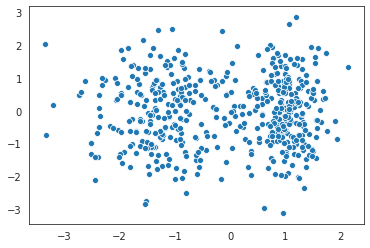

In [7]:
sns.scatterplot(X[:,0], X[:,1])

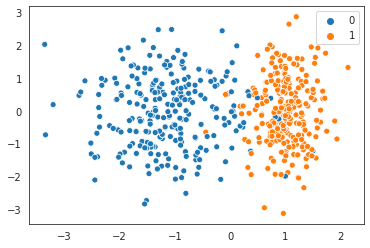

In [8]:
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

In [29]:
## Hyperparameters & initial states
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

Initial Loss is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.26845157]
 [-0.26845157]
 [ 3.29587172]
 [ 0.03221762]] 



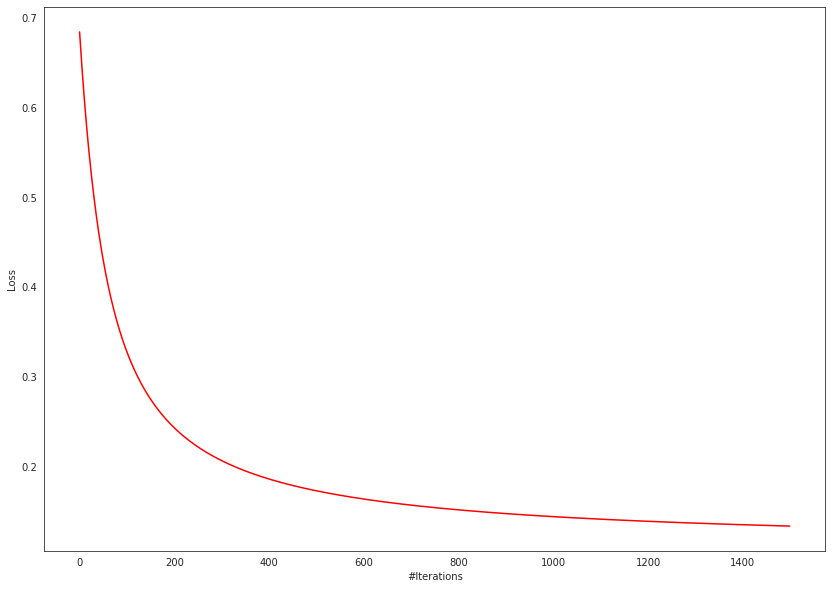

In [30]:
iterations = 1500
learning_rate = 0.03

initial_loss = loss_function(X, y, params)

print("Initial Loss is: {} \n".format(initial_loss))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

fig = plt.figure(figsize=(14,10))
ax = plt.axes()

ax.plot(range(len(cost_history)), cost_history, 'r')

ax.set_xlabel("#Iterations")
ax.set_ylabel("Loss");


### What if we import scikit-learn?

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
log_reg.coef_

array([[-0.4665127 ,  4.15486656,  0.04778306]])

In [15]:
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt =  DecisionTreeClassifier(max_depth=20)

In [17]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
dt.predict(X)

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [25]:
accuracy_score(dt.predict(X), y)

1.0

In [26]:
accuracy_score(log_reg.predict(X),y)

0.966

In [27]:
svc = LinearSVC(C=0.1)
svc.fit(X, y)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [28]:
accuracy_score(svc.predict(X), y)

0.966

In [32]:
accuracy_score(predict(X, params_optimal),y)

0.968